Precisaremos das bibliotecas TensorFlow, Numpy e Pandas. Para importá-las, usamos o comando "import". No caso, tornamos estas bibliotecas acessíveis (semelhante a objeto), como por exemplo, importando a biblioteca TensorFlow como tf, para podemos executar um comando como: **tf**.keras.models.Sequential()  


---



**Quais são as bibliotecas que utilizaremos para trabalhar?**

> **TensorFlow** é a biblioteca que nos permite trabalhar com as Redes Neurais Artificiais (ANN), é uma biblioteca desenvolvida pela Google que pode ser utilizada em Python e JavaScript, principalmente. Neste caso, utilizaremos a biblioteca para montar nosso modelo de aprendizado artificial. 

> **Numpy** é a biblioteca que nos permitirá manipular os dados que forem importados do Excel de forma que estes possam ser acessados pelo TensorFlow. Teoricamente, estes dados já deveriam ser acessíveis, porém, muitas vezes precisamos convertê-los, mudar a forma de um vetor importado, etc.

> **Pandas** é a biblioteca (que existe para outras linguagens mas é muito utilizada dentro da área de Machine Learning em Python) utilizada para, por exemplo, acessar os dados de uma planilha do Excel. Normalmente, essa biblioteca permite que importemos os dados direto para um vetor da forma que precisarmos, porém, talvez, como dito, precisemos manipular o vetor pelo Numpy. Não sei se o Pandas funciona para importar dados do Google Planilhas, mas tentaremos, se não funcionar, é só baixar o arquivo no formato que seja reconhecido pelo Pandas.

Para rodarmos o Pandas para arquivos xlsx no Google Collab, precisamos instalar a biblioteca para Excel do Python via: "!pip install -q xrld" 


---





In [1]:
from scipy import stats
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import math
import seaborn as sns


In [2]:
def mean_pred(y_true, y_pred): #Loss function for problem error evaluation on TensorFlow
    RMSE = tf.sqrt(tf.losses.mean_squared_error(y_true, y_pred))
    return RMSE

In [113]:
from sklearn.model_selection import train_test_split
#Split Data - train_test_split simple splitting
X_train, X_test, y_train, y_test = train_test_split(
    df, labels, test_size=0.2, random_state=89) #Split data to 20% test and 80% training

In [115]:
#Fit a linear regressor (sklearn) for predicted x real evaluation (R2, etc.)
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(y_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [116]:
shape = np.shape(X_train) #Shape of train array (number of events, no of variables)
num_var = shape[1] #how many variables on training data
print(shape[0])

87


In [117]:
model = tf.keras.models.load_model('Otimizacao de Solucoes Para Criopreservacao de Hepatocitos/models/model_current.h5', custom_objects={'mean_pred': mean_pred}, compile=False) #load the existing model

In [118]:
test_ans = model.predict(X_test) #predict the test data and create an array of results

In [119]:
t = 4
x_predict = df[t] #get t (index) data from the original excel table

print(df[t]) #print the parameters from t
print(labels[t]) #print the result of t
print(model.predict(x_predict)) #print the ann predicted result from t

[[0.  0.  0.6 1.  0.  0.  0.4]]
[0.85]
[[0.91053706]]


In [120]:
tensor_RMSE = math.sqrt(mean_squared_error(y_test, test_ans)) #get RMSE from real x predicted
print("RMSE: " + str(tensor_RMSE))

RMSE: 0.1371484367545558


In [121]:
#test_r2_score = r2_score(y_test, test_ans)
#print("R2: " + str(test_r2_score))

In [122]:
X_test.shape

(22, 7)

In [124]:
#Print the model that is being used with the tensorflow format
#tf.keras.models.save_model(model, 'model.h5')

R2 Score from RxR + Scatter Predicted: 0.574238
R2 Score from predicted x real 0.723037


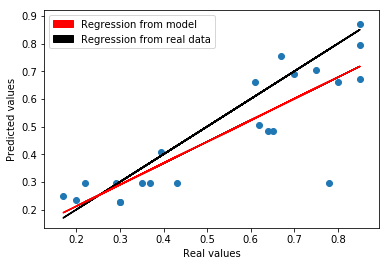

In [125]:
r2_score = linear_reg.score(y_test, test_ans) #print r2 score from the predicted results vs the real data
print("R2 Score from RxR + Scatter Predicted: %f" %r2_score) 

slope, intercept, r_value, p_value, std_err = stats.linregress(
        y_test[:, 0], test_ans[:,0]) #get some constants and results from the regression line generated from the neural network
print("R2 Score from predicted x real %f" %r_value**2) #print the r2 of predicted value x fitted line on ann 


plt.scatter(y_test, test_ans) #plot the predicted values (y) x real(x)
plt.plot(y_test, y_test, 'black', label='real values') #plot the alpha=1 line (real x real)
plt.plot(y_test, intercept + slope * y_test, 'r', label='fitted line') #plot the ann regression line
plt.xlabel('Real values')
plt.ylabel('Predicted values')


import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Regression from model')
black_patch = mpatches.Patch(color='black', label='Regression from real data')
plt.legend(handles=[red_patch, black_patch])
#intercept + slope * y_test

#plt.savefig('model_test_1.png') #save the generated figure
plt.show() #show graphic


y = ax + b
x = y-b/a
#you can use this formula to get which y data (predicted) correspond to the real data.
For example: 
predicted = 0.5 but when the correspondent X value is seen, is 1. So, it is used the formula to "convert" the prediction error to real value

In [126]:
#Get value from linear regression and convert it to number that corresponds on y_test
i = 15 
x_p = (test_ans[i] - intercept)/slope #use the formula described before to get the "real correspondent value"
print(X_test[i]) #print the test parameter from index i
print(x_p) #print the converted result from predicted
print(y_test[i]) #print the real result

[[0.  0.1 0.9 2.  0.3 0.  0. ]]
[0.22873797]
[0.2]


In [127]:
tf.keras.Model.save_weights(model, "saved.h5") #save model weights
import h5py
data = h5py.File('saved.h5')
list(data.keys())

['dense_55', 'dense_56', 'dense_57', 'dense_58', 'dense_59', 'dropout_11']

In [128]:
import random

In [129]:
#data = [('dmso', 0.1), ('sfb', 0.4), ('meiocult', 0.5), ('tipomeiocult', 1), ('viabilidadeinicial', 0.9), ('t', 0), ('g', 0), ('s', 0)]
data = X_train
fitnesses = [1]
def fitness (individual, data):
    fitness = 0
    #print(individual)
    #print(np.shape(individual))
    ind_predicted = model.predict(individual)[0] #get the predicted value from ann
    fitness = abs((ind_predicted - intercept)/slope) #convert the value from regression fit
    #print(fitness)
    if(fitnesses[-1]>fitness): #if the fitness from the current individual analyzed is smaller than last one, add it to an array
        fitnesses.append(fitness) #This array is used to plot the generation graphics
    return fitness

#test_ans = model.predict(X_test)
#individual_test = np.array([[0.8,0.1,1,0,0,0,0]])
#print(fitness(individual_test, data))
#print(type(individual_test))

In [130]:
#create initial population with limited range (avoid outliers and exaggerated parameters), keep it real
def create_individual(data):
    dmso = random.uniform(0, 0.25)
    sfb = 0.11
    meio_cultura = 0.77
    tipo_meio = 4
    sugar_choice = random.randint(1,2)
    if(sugar_choice == 1):
        trehalose = random.uniform(0,0.5)
        glic = 0
        sac = 0
    elif(sugar_choice == 2):
        glic = random.uniform(0,0.5)
        trehalose = 0
        sac = 0
    elif(sugar_choice == 3):
        sac = random.uniform(0,0.5)
        trehalose = 0
        glic = 0
    return np.array([[dmso, sfb, meio_cultura, tipo_meio, trehalose, glic, sac]])
print(create_individual(data))

[[0.01877631 0.11       0.77       4.         0.         0.18369591
  0.        ]]


In [131]:
def crossover(parent_1, parent_2):
    #crossover_index = np.random.uniform(0,1, len(parent_1))
    crossover_index = np.random.randint(0, np.shape((parent_1))[1]) #How many variables will come from parent 1 or 2
    #print(parent_1);print(parent_2)
    #print(crossover_index)
    #print("Parent1:");print(parent_1[0][:crossover_index])
    #print("Parent2:");print(parent_2[0][crossover_index:])
    #The crossing over will generate 2 individuals: one with the first values form parent 1 and rest with values from p2 & another with first values from parent2 
    child_1 = np.array([parent_1[0][:crossover_index]]) 
    child_1 = np.append(child_1, parent_2[0][crossover_index:])
    child_2 = np.array([parent_2[0][:crossover_index]])
    child_2 = np.append(child_2, parent_1[0][crossover_index:])
    #Reshape the arrays for the ann used shape
    child_1 = child_1.reshape(1,num_var)
    child_2 = child_2.reshape(1,num_var)
    #print("Child1:");print(child_1)
    #print("Child2:");print(child_2)
    return child_1, child_2

In [132]:
# For the mutate function, supply one individual (i.e. a candidate solution representation) as a parameter:
import random
def mutate(individual):
    #print(individual[0])
    mutate_index = random.randrange(np.shape(individual)[0])
    if individual[0][mutate_index] == 0:
        individual[0][mutate_index] == 1
    else:
        individual[0][mutate_index] == 0

In [135]:
pop = 1000
from pyeasyga.pyeasyga import GeneticAlgorithm
ga = GeneticAlgorithm(data, population_size=pop,
                               generations=150,
                               crossover_probability=0.2,
                               mutation_probability=0.1,
                               elitism=False,
                               maximise_fitness=False)


In [136]:
ga.create_individual = create_individual
ga.fitness_function = fitness
ga.crossover_function = crossover
ga.mutate_function = mutate

ga.run()
best_ind = ga.best_individual()
print(best_ind)

(array([0.03590884], dtype=float32), array([[2.51465080e-03, 1.10000000e-01, 7.70000000e-01, 4.00000000e+00,
        4.63536949e-01, 0.00000000e+00, 0.00000000e+00]]))


In [137]:
#Create a graphics for generation x fitness
x_axis = []
i = 0
for index in range(len(fitnesses)):
    i += 1 #for each parameters in fitness value, get an index value on an array that will be used to plot X axis on graphic
    x_axis.append(i)
print(x_axis)
print(fitnesses)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[1, array([0.29070625], dtype=float32), array([0.173343], dtype=float32), array([0.15481198], dtype=float32), array([0.1489012], dtype=float32), array([0.1422359], dtype=float32), array([0.09571205], dtype=float32), array([0.07876156], dtype=float32), array([0.05729976], dtype=float32), array([0.05151327], dtype=float32), array([0.04097053], dtype=float32), array([0.03669538], dtype=float32), array([0.03590884], dtype=float32)]


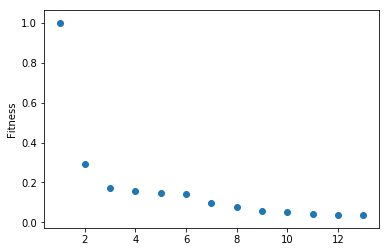

<Figure size 432x288 with 0 Axes>

In [138]:
#Graphics from fitness decrease during generation
plt.scatter(x_axis, fitnesses)
plt.ylabel('Fitness')
plt.show()
plt.savefig('ga_1.png')

In [139]:
#Print the parameters from the best individual on an organized and understandable way
dmso = best_ind[1][0][0]*100
sfb = best_ind[1][0][1]*100
conc_meio = best_ind[1][0][2]*100
meio = best_ind[1][0][3]
treh = best_ind[1][0][4]*100
glic = best_ind[1][0][5]*100
sac = best_ind[1][0][6]*100
print(" Parametros: \n DMSO:%f \n SFB: %f \n CONCENTRACAO DE MEIO: %f\n MEIO: %f\n Trehalose: %f\n Glicerol %f\n Sacarose: %f\n" %(dmso, sfb, conc_meio, meio, treh, glic, sac))

 Parametros: 
 DMSO:0.251465 
 SFB: 11.000000 
 CONCENTRACAO DE MEIO: 77.000000
 MEIO: 4.000000
 Trehalose: 46.353695
 Glicerol 0.000000
 Sacarose: 0.000000

